# Introduction
The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. <br>
<font color=blue>
    
Content:
    
1. [Load and Check Data](#1)
2. [Variable Description](#2) <br>
     * 2.1 [Univariate Variable Analysis](#3) <br>
      * 2.1.1 [Categorical Variable Analysis](#4)<br>
      * 2.1.2 [Numerical Variable Analysis](#5) <br>
3. [Basic Data Analysis](#6) <br>
4. [Outlier Detection](#7) <br>
5. [Missing Value](#8) <br>
    * 5.1 [Find Missing Value](#9)<br>
    * 5.2 [Fill Missing Value](#10) <br>
6. [Visualization](#11) <br> 
    * 6.1. [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12) <br>
    * 6.2. [SibSp -- Survived](#13) <br>
    * 6.3. [Parch -- Survived](#14) <br>
    * 6.4. [Pclass -- Survived](#15) <br>
    * 6.5. [Pclass -- Survived](#16) <br>
    * 6.6. [Pclass -- Survived -- Age](#17) <br>
    * 6.7. [Embarked -- Sex -- Pclass -- Survived](#18) <br>
    * 6.8. [Embarked -- Sex -- Fare -- Survived](#19) <br>
    * 6.9. [Fill Missing: Age Feature](#20) <br>
7. [Feature Engineering](#21) <br> 
    * 7.1. [Name -- Title](#22) <br>
    * 7.2. [Family Size](#23) <br>
    * 7.3. [Embarked](#24) <br>
    * 7.4. [Ticket](#25) <br>
    * 7.5. [Pclass](#26) <br>
    * 7.6. [Sex](#27) <br>
    * 7.7. [Drop Passenger ID and Cabin](#28) <br>
    
8. [Modeling](#29) <br> 
    * 8.1. [Train - Test Split](#30) <br>
    * 8.2. [Simple Logistic Regression](#31) <br>
    * 8.3. [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) <br>
    * 8.4. [Ensemble Modeling](#33) <br>
    * 8.5. [Prediction and Submission](#34) <br>
    

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [174]:
plt.style.use('fivethirtyeight')  #change the style of plot, by writing plt.style.available you can reach different type of plots 
warnings.filterwarnings('ignore')  #ignore warnings 

<a id="1"> </a> <br>
## 1.Load and Check Data

In [175]:
train_df=pd.read_csv(r"C:\Users\Hamza\Desktop\Datai 4 Machine Learning\Titanic Project\train.csv")
test_df=pd.read_csv(r"C:\Users\Hamza\Desktop\Datai 4 Machine Learning\Titanic Project\test.csv")
test_PassengerID=test_df['PassengerId']  # I will use it later

In [176]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [177]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
train_df.describe()   #statistical info for numerical features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="2"> </a> <br>
## 2.Variable Description

<a id="3"> </a> <br>
### 2.1. Univariate Variable Analysis

*Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch <br>
*Numerical Variable: Fare, age and passengerId

<a id="4"> </a> <br>
#### 2.1.1 Categorical Variable

In [179]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    #get feature
    var=train_df[variable]
    #count num of categorical variable
    varValue=var.value_counts()
    
    #visualization
    plt.figure(figsize=(9,4))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

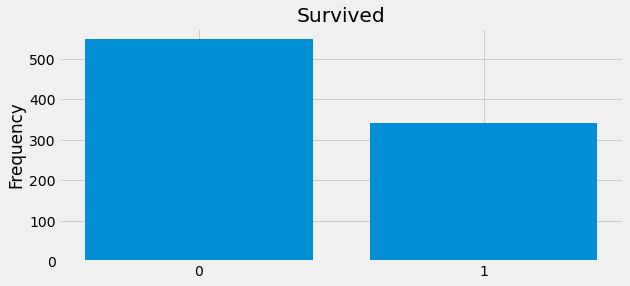

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


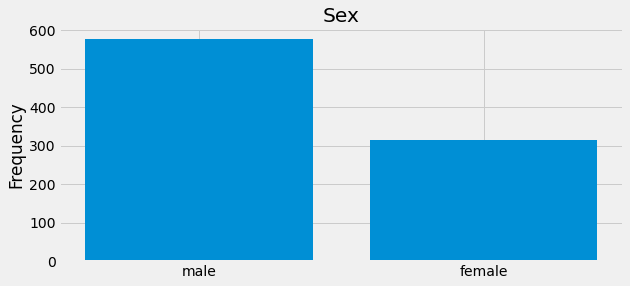

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


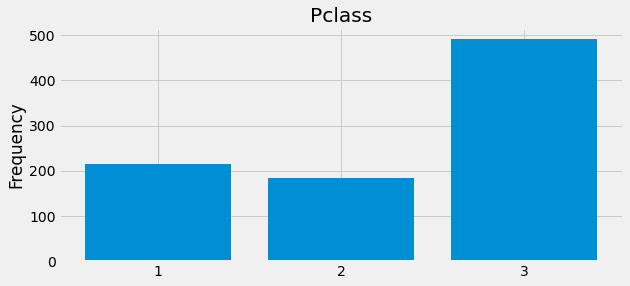

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


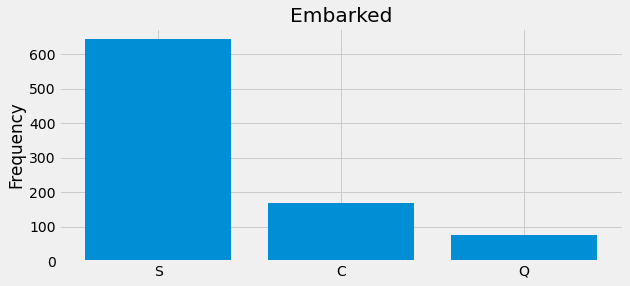

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


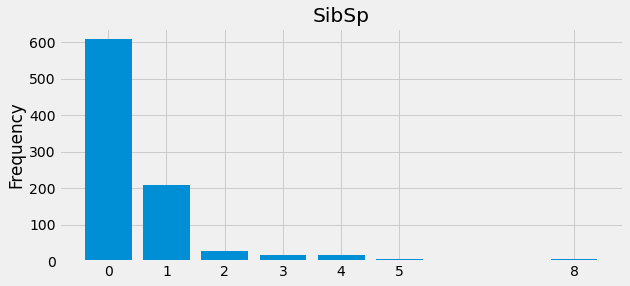

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


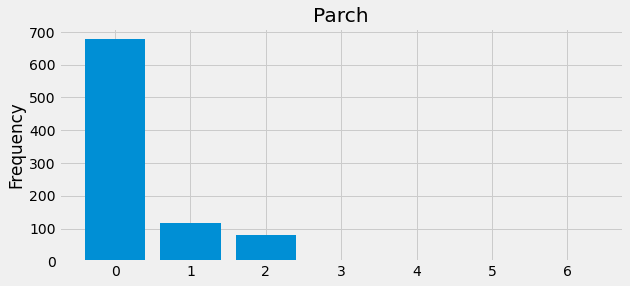

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [180]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [181]:
category2 = ["Cabin", "Name", "Ticket"]   #since there is too much category, I seperated these features from category1
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
D              3
              ..
D37            1
A16            1
B38            1
D11            1
B42            1
Name: Cabin, Length: 147, dtype: int64 

Bjornstrom-Steffansson, Mr. Mauritz Hakan    1
Paulner, Mr. Uscher                          1
Cunningham, Mr. Alfred Fleming               1
Alhomaki, Mr. Ilmari Rudolf                  1
LeRoy, Miss. Bertha                          1
                                            ..
Sage, Miss. Constance Gladys                 1
Nysten, Miss. Anna Sofia                     1
Hagland, Mr. Ingvald Olai Olsen              1
Oreskovic, Miss. Marija                      1
Blackwell, Mr. Stephen Weart                 1
Name: Name, Length: 891, dtype: int64 

347082               7
1601                 7
CA. 2343             7
3101295              6
CA 2144              6
                    ..
PC 17596             1
S.O.P. 1166          1
330919               1
349203  

<a id="5"> </a> <br>
#### 2.1.2 Numerical Variable

In [182]:
def plot_hist(variable):
    
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=10)  #bins: number of intervals you want to divide all of your data into, default:10
    plt.ylabel("Frequency")
    plt.title("{} distribution".format(variable))
    plt.show()

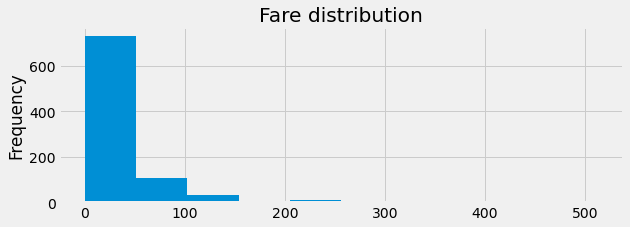

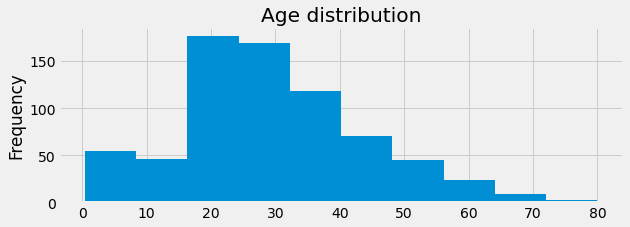

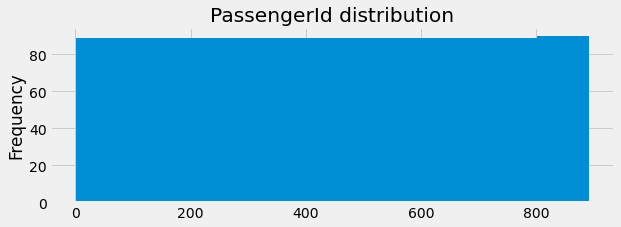

In [183]:
numericVar=['Fare','Age','PassengerId']
for n in numericVar:
    plot_hist(n)

<a id="6"> </a> <br>
## 3. Basic Data Analysis

Let's check if there is correlation between survived and some other features

In [184]:
#  Pclass - Survived
train_df[['Pclass','Survived']].head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [185]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)
#ascending=False -> means dipping according to 'Survived'
#group by Pclass: 0,1,2

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [186]:
#Sex - Survived
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [187]:
#SibSp - Survived
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [188]:
#Parch - Survived
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [189]:
#Embarked - Survived
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<a id="7"> </a> <br>
## 4. Outlier Detection

In [190]:
def detect_outliers(df,features):
    outlier_indices=[]
    for each in features:
        #1st quartile
        Q1=np.percentile(df[each],25)  #for the first quartile
        #3rd quartile
        Q3=np.percentile(df[each],75)  #for the third quartile
        #IQR
        IQR=Q3-Q1
        #outlier step
        outlier_step=IQR*1.5
        #detect outlier and their indices
        outlier_list_col= df[ (df[each]<Q1-outlier_step) | (df[each] > Q3 + outlier_step) ].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)   #count the num of outliers
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>2)  
    #I define nums bigger than 2 as outlier since I dont wanna miss lots of data
    
    return multiple_outliers

In [191]:
train_df.loc[detect_outliers(train_df,['Age','SibSp','Parch','Fare'])]    #columns with more than 2 outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [192]:
#drop outliers
train_df=train_df.drop(detect_outliers(train_df,['Age','SibSp','Parch','Fare']),axis=0).reset_index(drop=True)

<a id="8"> </a> <br>
## 5. Missing Value

In [193]:
train_df_len=len(train_df)   #to not to forget real train size
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=0)   
#concatenate train and test to analyse together, I will seperate them after I do some regulation

<a id="9"> </a> <br>
### 5.1. Find Missing Value

In [194]:
train_df.columns[train_df.isnull().any()]  #the columns that have null values

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [195]:
train_df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id="10"> </a> <br>
### 5.2. Fill Missing Value

In [196]:
train_df[train_df['Embarked'].isnull()]    

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Let us predict these null values by looking the Fare values. Here, Fare values are both 80.

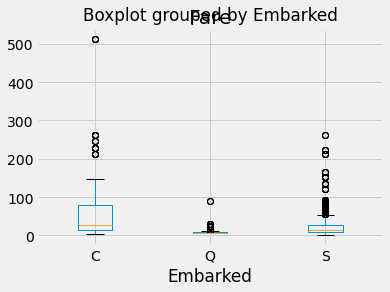

In [197]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

By looking this boxplot, we can say that only C value in Embarked is likely to be 80. So we can choose Embarked as 'C'.

In [198]:
train_df['Embarked'] = train_df['Embarked'].fillna('C')   #fill nulls with C

Instead of deleting the data, we choose filling it with logical values

In [199]:
train_df[train_df['Embarked'].isnull()]   #now there is no null values

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [200]:
train_df[train_df['Fare'].isnull()] 

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


I see that this person is 3rd class. Let's look at people who are 3rd class:

In [201]:
np.mean(train_df[train_df['Pclass']==3]['Fare'])

12.741219971469327

Average 3rd person have paid 12.74 for the ticket. I will choose this value to place the missing value

In [202]:
train_df['Fare'] = train_df['Fare'].fillna(np.mean(train_df[train_df['Pclass']==3]['Fare']))

In [203]:
train_df[train_df['Fare'].isnull()]   #there is no more missing values

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="11"> </a> <br>
## 6. Visualization

<a id="12"> </a> <br>
### 6.1. Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

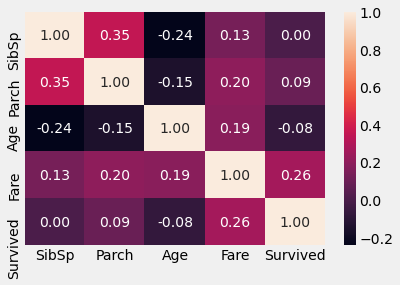

In [204]:
list1= ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot=True,fmt=".2f")     #fmt=".2f"  after comma
plt.show()

SurvivedFare feature seems to have correlation with survived feature. This does not mean other features are not important

<a id="13"> </a> <br>
### 6.2. SibSp -- Survived 

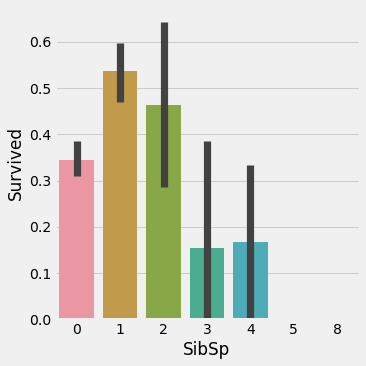

In [205]:
a=sns.factorplot( x="SibSp",y="Survived", data=train_df, size=5, kind="bar" )   #survived probability

We can say that there is less chance to survive if the passenger has more than 2 SibSp and we may categorize them as having more than 2 SibSp and others

<a id="14"> </a> <br>
### 6.3. Parch -- Survived 

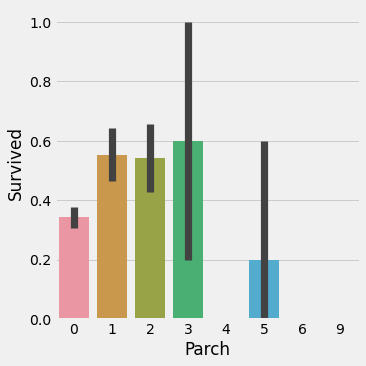

In [206]:
a=sns.factorplot(x="Parch",y="Survived", kind="bar",data=train_df,size=5)  #black line is std 

* SibSp and Parch can be used for new feature extraction with treshold=3
* Small families have more chance to survive
* There is higher std in survival of passengers with 3 Parch 

<a id="15"> </a> <br>
### 6.4. Pclass -- Survived

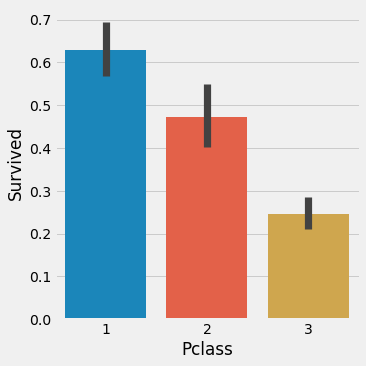

In [207]:
a=sns.factorplot(x="Pclass",y="Survived",kind="bar",size=5,data=train_df)

It is clear that the higher the class the passenger has more chance to survive. Std's are almost same

<a id="16"> </a> <br>
### 6.5. Age -- Survived

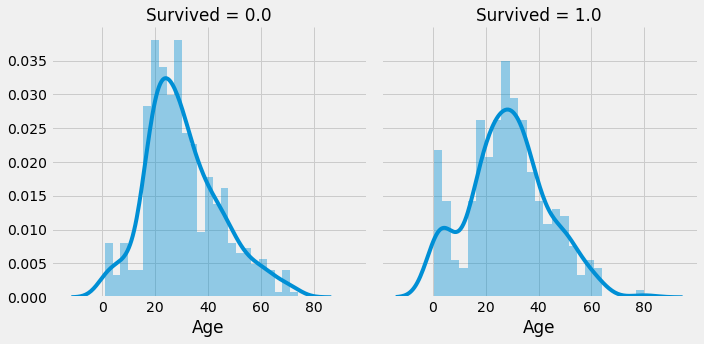

In [208]:
a=sns.FacetGrid(train_df, col='Survived',size=5)
a.map(sns.distplot,"Age",bins=25)
plt.show()

* As you guess, it is clear that the babies and kids(age<10) are more likely to survive. The distributions seem like Gausian Distribution.
* Oldest passengers(80) survived
* The passenger who are in 20s, had less chance to survive. Contrary, adults in their 30s have more chance.
* Use age feature in training
* Use age distribution for missing value of age

<a id="17"> </a> <br>
### 6.6. Pclass -- Survived -- Age 

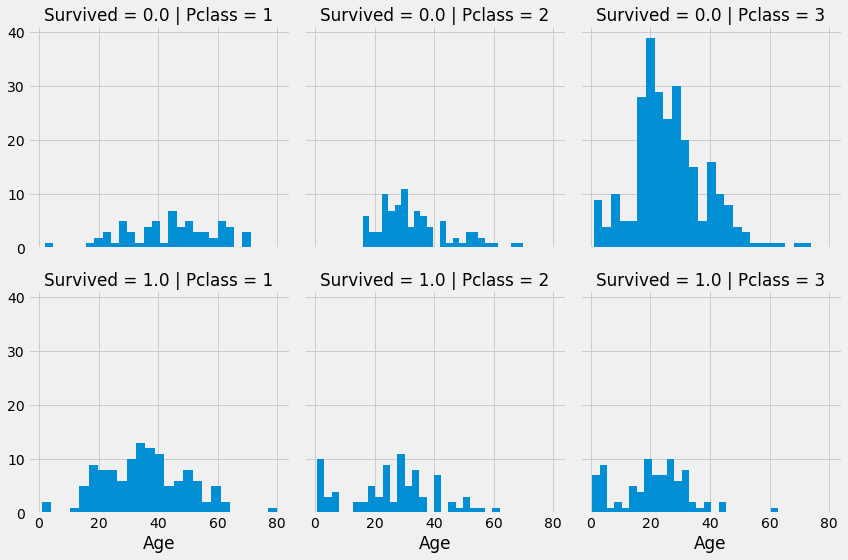

In [209]:
a=sns.FacetGrid(train_df,col='Pclass',row='Survived',size=4)
a.map(plt.hist,'Age',bins=25)

As you see, most of the deaths are from 3rd class so Pclass will be very important for model training

<a id="18"> </a> <br>
### 6.7. Embarked -- Sex -- Pclass -- Survived

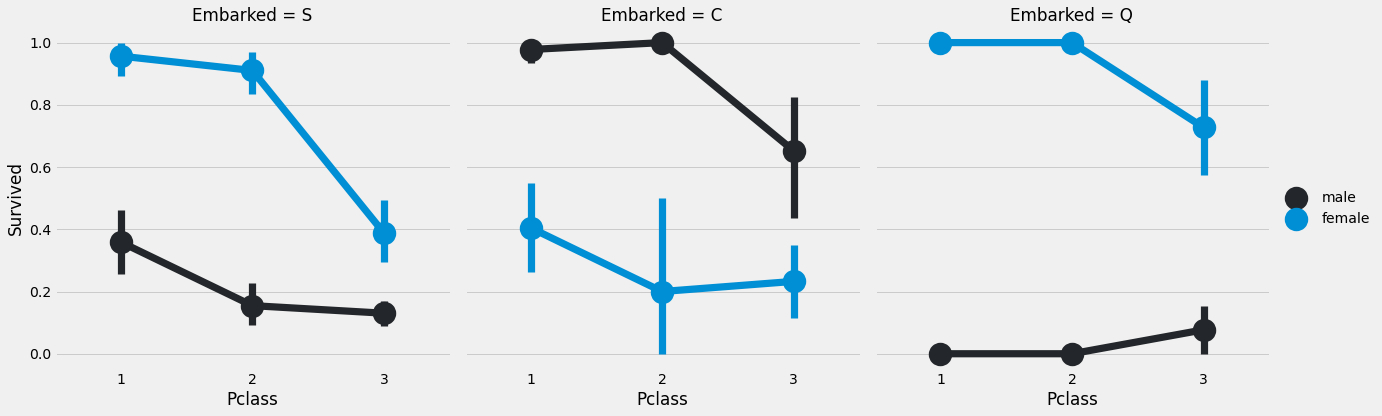

In [210]:
a=sns.FacetGrid(train_df,col='Embarked',size=6)
a.map(sns.pointplot,'Pclass','Survived','Sex')
a.add_legend()

* Female passengers have much more survival rate than male
* Males have more survival chance in C
* Embarked and Sex will be used in training

<a id="19"> </a> <br>
### 6.8. Embarked -- Sex -- Fare -- Survived

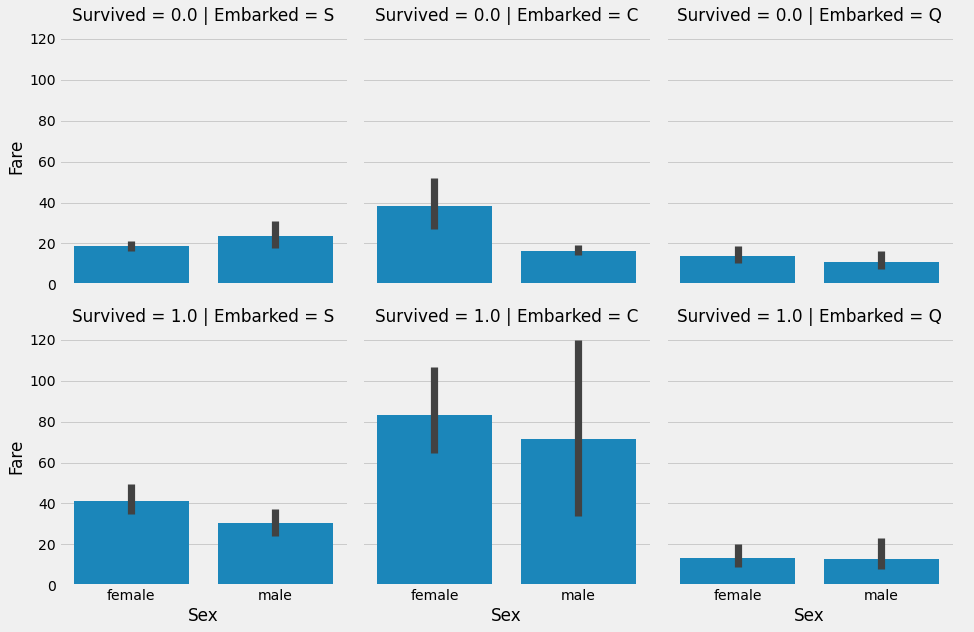

In [211]:
a=sns.FacetGrid(train_df,row='Survived',col='Embarked', size=4.5)
a.map(sns.barplot,'Sex','Fare')
a.add_legend()

* Except for Q Embarked, we can say that the more the passenger paid for the ticket, tho more chance they have to survive
* Fare can be used as categorical in the training model

<a id="20"> </a> <br>
### 6.9. Fill Missing: Age Feature

In [212]:
train_df[train_df['Age'].isnull()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


There are 256 missing age values

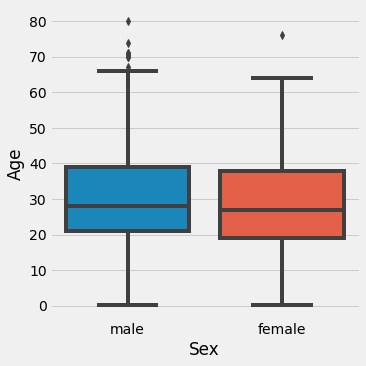

In [213]:
sns.factorplot(x='Sex',y='Age',data=train_df,kind='box')

Medians of male and female are almost same, so we can not say passengers age by just looking the sex 

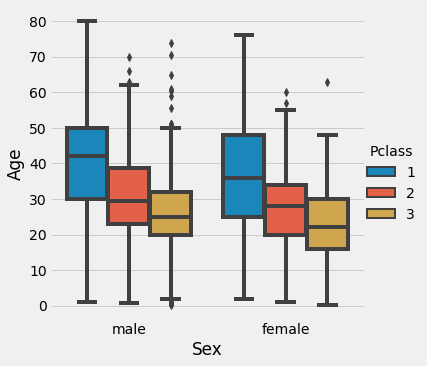

In [214]:
sns.factorplot(x='Sex',y='Age',hue='Pclass',data=train_df,kind='box')

You see that the more the higher class, the older the passenger, so we may use this

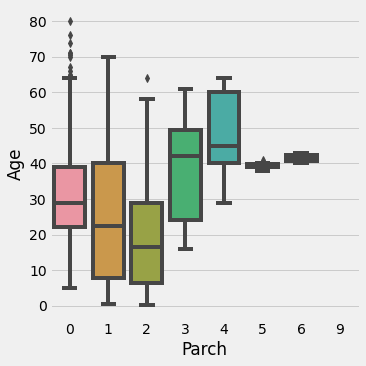

In [215]:
sns.factorplot(x='Parch',y='Age',data=train_df,kind='box')

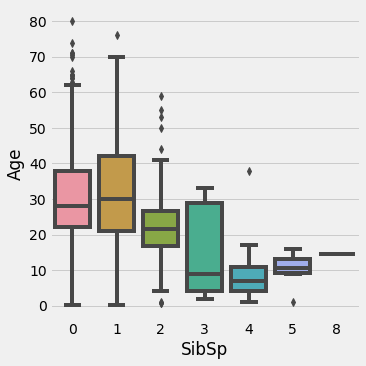

In [216]:
sns.factorplot(x='SibSp',y='Age',data=train_df,kind='box')

In [217]:
train_df['Sex'] = [ 1 if i == 'male' else 0 for i in train_df['Sex']]

In [218]:
train_df['Sex'].head()  #converted to numerical values

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

<AxesSubplot:>

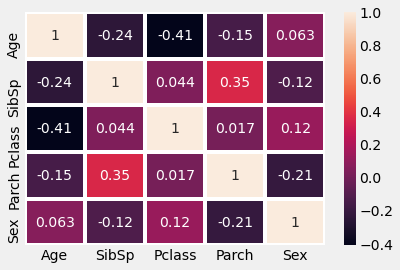

In [219]:
sns.heatmap(train_df[['Age','SibSp','Pclass','Parch','Sex']].corr(),annot=True,linewidths=3)

As you see above, there is no corr between age and sex but Parch, Pclass and SibSp features have corr with Age

In [220]:
index_nan_age=train_df['Age'][train_df['Age'].isnull()].index  #get the indexes
for i in index_nan_age:
    age_pred=train_df['Age'][ (train_df['SibSp']==train_df.iloc[i]['SibSp']) & (train_df['Parch']==train_df.iloc[i]['Parch']) & (train_df['Pclass']==train_df.iloc[i]['Pclass'])].median()
    age_median = train_df['Age'].median()
    if not np.isnan:  #if it is not null
        train_df['Age'].iloc[i] = age_pred
    else:
        train_df['Age'].iloc[i] = age_median
        

In [221]:
train_df['Age'].isnull().sum()  #no more missing value

0

<a id="20"> </a> <br>
## 7. Feature Engineering

<a id="22"> </a> <br>
### 7.1. Name -- Title

In [222]:
train_df['Name'].head(8)   #lets create a new feature

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object

In [223]:
name = train_df['Name']
train_df['Title'] = [ i.split(',')[1].split('.')[0].strip() for i in name ]   #list comprehension
train_df['Title']    #get the titles

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1294        Mr
1295      Dona
1296        Mr
1297        Mr
1298    Master
Name: Title, Length: 1299, dtype: object

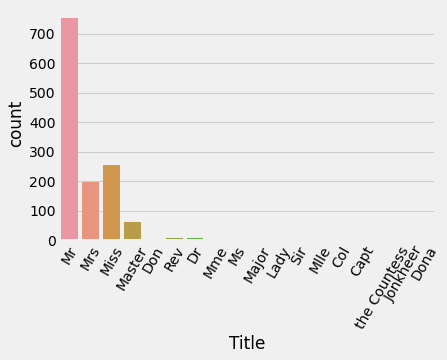

In [224]:
sns.countplot(x='Title',data=train_df)
plt.xticks(rotation=60)
plt.show()

Lets replace the unkown titles

In [225]:
train_df['Title'] = train_df['Title'].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],'Others')

<function matplotlib.pyplot.show(close=None, block=None)>

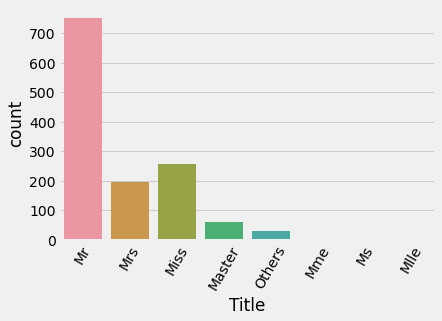

In [226]:
sns.countplot(x='Title',data=train_df)
plt.xticks(rotation=60)
plt.show

Lets convert the title values into 4 categorical values

In [227]:
train_df['Title'] = [0 if i == 'Master' else 1 if i=='Miss' or i == 'Mrs' or i == 'Ms' or i == 'Mlle' else 2 if  i=='Mr' else 3 for i in train_df['Title']]

In [228]:
train_df['Title'].head(8)  #seems converted

0    2
1    1
2    1
3    1
4    2
5    2
6    2
7    0
Name: Title, dtype: int64

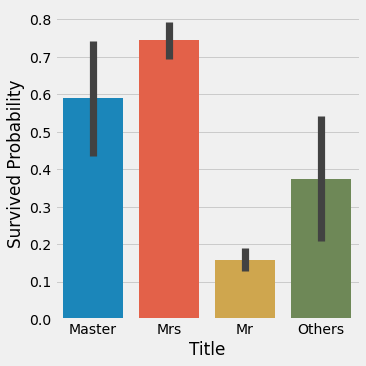

In [229]:
a=sns.factorplot(x='Title',y='Survived', data=train_df, kind='bar')
a.set_xticklabels(('Master','Mrs','Mr','Others'))
a.set_ylabels('Survived Probability')

It is understood that people with title 'Mrs' is more likely to survive

Since we created a new feature from 'Name' we can drop it 

In [230]:
train_df.drop(labels='Name',inplace=True,axis=1)

In [231]:
train_df.head()   #no name feature

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [232]:
train_df = pd.get_dummies(train_df,columns=['Title'])
train_df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,413,1305,NaN,3,1,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0
1295,414,1306,NaN,1,0,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0,1
1296,415,1307,NaN,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0
1297,416,1308,NaN,3,1,28.0,0,0,359309,8.0500,NaN,S,0,0,1,0


<a id="23"> </a> <br>
### 7.2. Family Size

In [233]:
train_df['Family_size'] = train_df['Parch']+train_df['SibSp']+1   #+1 is for the person 
train_df['Family_size']

0       2
1       2
2       1
3       2
4       1
       ..
1294    1
1295    1
1296    1
1297    1
1298    3
Name: Family_size, Length: 1299, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

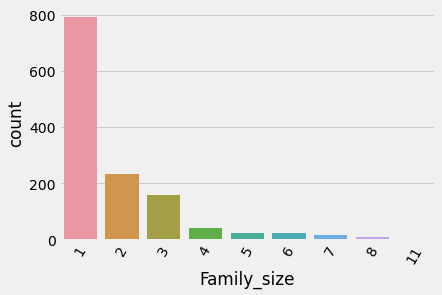

In [234]:
sns.countplot(x='Family_size',data=train_df)
plt.xticks(rotation=60)
plt.show

Most people have no SibSp and Parch

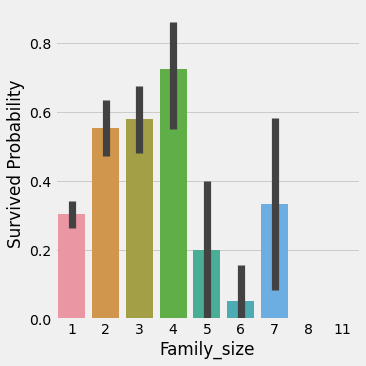

In [235]:
a=sns.factorplot(x='Family_size',y='Survived', data=train_df, kind='bar')
a.set_ylabels('Survived Probability')

The larger the family, less chance to survive. I will differ them by family size

In [236]:
train_df['Family_size'] = [ 0 if i<5 else 1 for i in train_df["Family_size"] ]   #0 if family size less than 5
train_df['Family_size'].head().sum()

0

In [241]:
train_df = pd.get_dummies(train_df,columns=['Family_size'])    #getdummies
train_df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Family_size_0,Family_size_1
0,0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0
1,1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0
2,2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0
3,3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,1,0
4,4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,413,1305,NaN,3,1,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,0
1295,414,1306,NaN,1,0,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0,1,1,0
1296,415,1307,NaN,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,0
1297,416,1308,NaN,3,1,28.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1,0


<a id="24"> </a> <br>
### 7.3. Embarked

In [244]:
train_df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

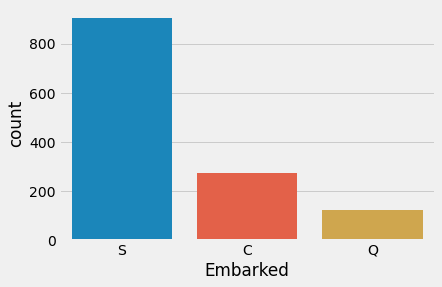

In [245]:
sns.countplot(x='Embarked',data=train_df)

In [247]:
train_df=pd.get_dummies(train_df,columns=['Embarked'])
train_df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Family_size_0,Family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,0,1
1,1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,1,0,0
2,2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,0,0,1
3,3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,1,0,0,0,1
4,4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,0,1


<a id="25"> </a> <br>
### 7.4. Ticket

In [251]:
train_df['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [264]:
tickets=[]
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"]=tickets       

In [267]:
train_df.Ticket.head(10)

0        A5
1        PC
2    STONO2
3         x
4         x
5         x
6         x
7         x
8         x
9         x
Name: Ticket, dtype: object

In [268]:
train_df=pd.get_dummies(train_df,columns=['Ticket'],prefix='T')
train_df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,0,1,0.0,3,1,22.0,1,0,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1.0,1,0,38.0,1,0,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,2,3,1.0,3,0,26.0,0,0,7.9250,NaN,...,0,0,0,0,1,0,0,0,0,0
3,3,4,1.0,1,0,35.0,1,0,53.1000,C123,...,0,0,0,0,0,0,0,0,0,1
4,4,5,0.0,3,1,35.0,0,0,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,1


<a id="26"> </a> <br>
### 7.5. Pclass

In [301]:
sns.countplot(x='Pclass',data=train_df)
plt.show()

ValueError: Could not interpret input 'Pclass'

In [271]:
train_df['Pclass'] = train_df['Pclass'].astype("category")

In [274]:
train_df=pd.get_dummies(train_df,columns=['Pclass'])
train_df.head()

,index,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.0,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1.0,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1.0,0,26.0,0,0,7.9250,NaN,0,...,0,1,0,0,0,0,0,0,0,1
3,3,4,1.0,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,1,1,0,0
4,4,5,0.0,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,1,0,0,1


<a id="27"> </a> <br>
### 7.6. Sex

In [279]:
train_df['Sex'] = train_df['Sex'].astype("category")
train_df=pd.get_dummies(train_df,columns=['Sex'])
train_df.head()

,index,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0,1,0.0,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,2,1.0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,1,0,0,1,0
2,2,3,1.0,26.0,0,0,7.9250,NaN,0,1,...,0,0,0,0,0,0,0,1,1,0
3,3,4,1.0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,1,1,0,0,1,0
4,4,5,0.0,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,1,0,0,1,0,1


In [280]:
train_df.columns

Index(['index', 'PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Family_size_0',
       'Family_size_1', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A',
       'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON',
       'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP',
       'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS',
       'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ',
       'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

<a id="28"> </a> <br>
### 7.7.Drop Passenger ID and Cabin 

In [281]:
train_df.drop(labels=["PassengerId","Cabin"],inplace=True,axis=1)
train_df.columns   #stated features have been dropped

Index(['index', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0',
       'Title_1', 'Title_2', 'Title_3', 'Family_size_0', 'Family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

<a id="29"> </a> <br>
## 8. Modeling

In [305]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

<a id="30"> </a> <br>
### 8.1.Train Test Split

In [285]:
train_df_len

881

In [290]:
test=train_df[train_df_len:]   #takes after the train lenght : test  (from 881 to 1298) 
test.drop(labels="Survived",axis=1,inplace=True)   #test dont take the objective

In [291]:
test.head()

,index,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,0,34.5,0,0,7.8292,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
882,1,47.0,1,0,7.0000,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
883,2,62.0,0,0,9.6875,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
884,3,27.0,0,0,8.6625,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
885,4,22.0,1,1,12.2875,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0


In [297]:
train= train_df[:train_df_len]   #from 0 to train_df_len(881)
X_train=train.drop(labels="Survived",axis=1)  #we will split train set into 2 part. One will be used for training, other validation
y_train=train["Survived"]

In [298]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.3,random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 616
X_test 265
y_train 616
y_test 265


Firstly we have defined the test set by applying the lenggth command . Then we split the train set into 2 part. First one is for training, second is for validation.

<a id="31"> </a> <br>
### 8.2.Simple Logistic Regression

In [300]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

acc_log_train=round(logreg.score(X_train,y_train)*100,2)
acc_log_test=round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}",acc_log_train)
print("Testing Accuracy: % {}",acc_log_test)

Training Accuracy: % {} 82.47
Testing Accuracy: % {} 83.02


<a id="32"> </a> <br>
### 8.3.Hyperparameter Tuning -- Grid Search -- Cross Validation

In [307]:
random_state=42
classifiers=[DecisionTreeClassifier(random_state=random_state),
            SVC(random_state=random_state),
            RandomForestClassifier(random_state=random_state),
            KNeighborsClassifier(),
            LogisticRegression(random_state=random_state)]

In [311]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   knn_param_grid,
                   logreg_param_grid]

In [313]:
cv_result = []
best_estimators = []
ML_model=["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]
for i in range(len(classifiers)):
    clf = GridSearchCV(classifiers[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print("Model: {} , accuracy: {}".format(ML_model[i],cv_result[i]))

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Model: DecisionTreeClassifier , accuracy: 0.8326282390269698
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Model: SVM , accuracy: 0.6394500264410364
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   32.5s finished


Model: RandomForestClassifier , accuracy: 0.8343997884717081
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Model: LogisticRegression , accuracy: 0.673611845584347
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Model: KNeighborsClassifier , accuracy: 0.8213643574828133


[Parallel(n_jobs=-1)]: Done 125 out of 140 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.6s finished


DecisionTreeClassifier, RandomForestClassifier and KNeighborsClassifier seem satisfied results with around 83%
But Logistic Regression and SVM are not a good modeling for us. 

Text(0.5, 1.0, 'Cross Validation Scores')

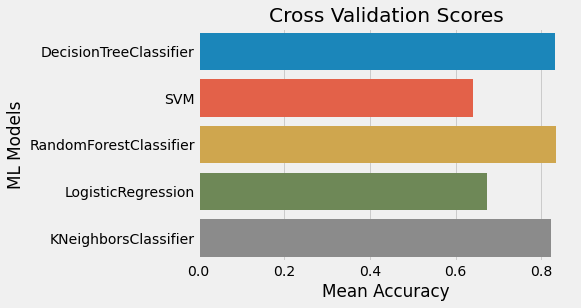

In [314]:
#Visualization of the ML modeling results
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})
g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id="33"> </a> <br>
### 8.4. Ensemble Modeling

In [317]:
votingClassifier = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("knn",best_estimators[4])],
                                        voting = "soft", n_jobs = -1)
votingClassifier = votingClassifier.fit(X_train, y_train)
print(accuracy_score(votingClassifier.predict(X_test),y_test))

0.8264150943396227


<a id="34"> </a> <br>
### 8.5. Prediction and Submission

In [319]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerID, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)